In [4]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
import palettable as pal

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_table = pd.read_csv("../assembly_evaluation_data/merged_annotation_stats.csv",index_col='SampleName')

In [3]:
false_crbb = pd.read_csv("../assembly_evaluation_data/false_crbb.csv",index_col=0)

In [4]:
false_crbb.head()

,false_crbb_num_transcripts
MMETSP1347,812
MMETSP0603,5341
MMETSP0469,101484
MMETSP1075,57113
MMETSP1369,46402


In [5]:
crbb_df = pd.merge(data_table[['total_annotated_w_false_crbb']],false_crbb[['false_crbb_num_transcripts']],
                   how='outer',left_index=True,right_index=True).dropna()

In [6]:
crbb_df.head()

,total_annotated_w_false_crbb,false_crbb_num_transcripts
MMETSP0004,2352,12265.0
MMETSP0005,1833,9950.0
MMETSP0006,4837,22569.0
MMETSP0007,1448,5599.0
MMETSP0010,4022,21159.0


In [7]:
data_table.columns

Index(['Unnamed: 0', 'n_seqs', 'total_annotation_names',
       'total_annotated_contigs', 'unique_annotations', 'total_false_crbb',
       'total_OrthoDB', 'unique_OrthoDB', 'false_crbb_OrthoDB', 'total_Pfam',
       'unique_Pfam', 'false_crbb_Pfam', 'total_Rfam', 'unique_Rfam',
       'false_crbb_Rfam', 'total_annotated_w_false_crbb'],
      dtype='object')

In [8]:
data_table_false_crbb = data_table[['SampleName','total_false_crbb','total_annotated_w_false_crbb']].dropna()

KeyError: "['SampleName'] not in index"

In [9]:
data_table_false_crbb.head()

NameError: name 'data_table_false_crbb' is not defined

(0, 30000)

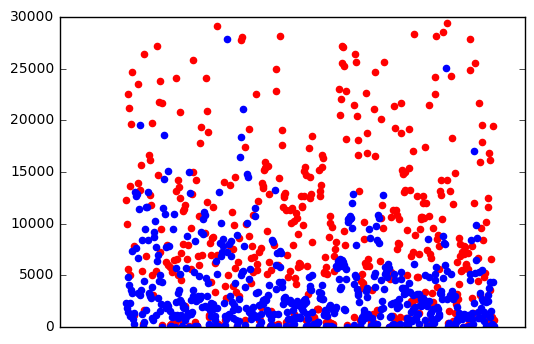

In [10]:
fig, ax = plt.subplots(1)
X = range(len(crbb_df))
Y1 = crbb_df[['false_crbb_num_transcripts']]
Y2 = crbb_df[['total_annotated_w_false_crbb']]

ax.scatter(X,Y1,color="red")
ax.scatter(X,Y2,color="blue")
ax.set_xticks([])
ax.set_ylim([0,30000])

In [11]:
crbb_df['difference']=crbb_df.false_crbb_num_transcripts-crbb_df.total_annotated_w_false_crbb

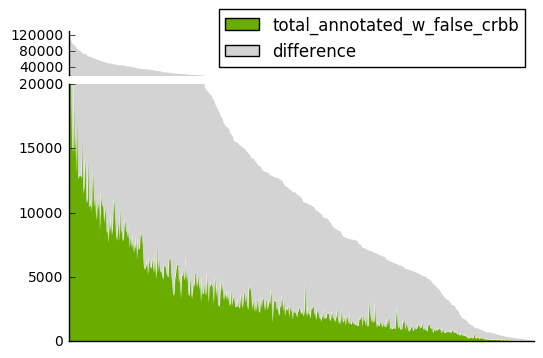

In [12]:
import matplotlib.gridspec as gridspec
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

gs = gridspec.GridSpec(6, 6)
ax = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1:,:])

crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[["total_annotated_w_false_crbb","difference"]].plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax)
# alternative legend labels:
# transcripts absent from NCGR
# anntoated absent transcripts
crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[['total_annotated_w_false_crbb','difference']].plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax2, legend=False)
ax.set_ylim([20000,130000])
ax2.set_ylim([0,20000])
simpleaxis(ax)
simpleaxis(ax2)
ax.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax.set_xticks([])
ax.set_yticks(np.arange(40000,120001,40000))
savefig('false_crbb.png')

In [18]:
crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)

,total_annotated_w_false_crbb,false_crbb_num_transcripts,difference
MMETSP0384,27882,124330.0,96448.0
MMETSP0039,19581,117665.0,98084.0
MMETSP1377,25096,110954.0,85858.0
MMETSP0469,18359,101484.0,83125.0
MMETSP0201,15014,99473.0,84459.0
MMETSP0527,14826,96257.0,81431.0
MMETSP0472,21085,95901.0,74816.0
MMETSP0528,14473,94671.0,80198.0
MMETSP1436,17035,91310.0,74275.0
MMETSP0027,13055,86357.0,73302.0


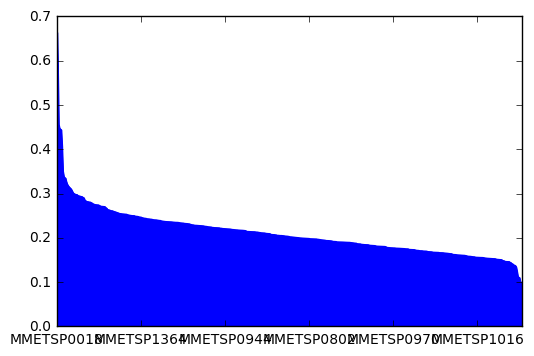

In [91]:
crbb_norm=crbb_df.T/crbb_df.false_crbb_num_transcripts
crbb_norm=crbb_norm.T
crbb_norm.total_annotated_w_false_crbb.sort_values(ascending=False).plot(kind='area', )

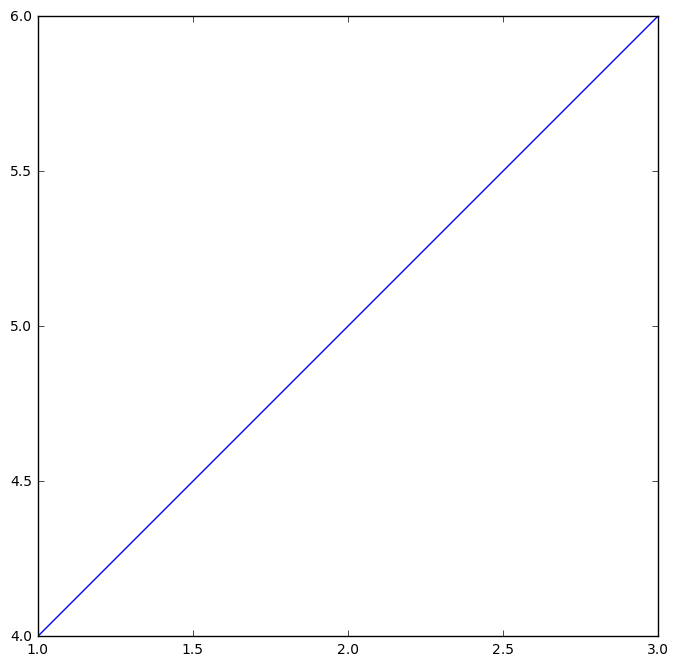

In [40]:
fig, axs= plt.subplots(1)
fig.set_size_inches(8,8)
axs.plot([1,2,3],[4,5,6])

In [13]:
imicrobe_kmers = pd.read_table("../assembly_evaluation_data/imicrobe_unique_kmers.txt",sep="\t",index_col="SampleName")

In [14]:
imicrobe_kmers.head()

,Unique_kmers
SampleName,
MMETSP0896,3013812
MMETSP0472,18654337
MMETSP0378,11445573
MMETSP0320,11595084
MMETSP0228,45605742


In [15]:
evaluation_frame = pd.read_csv("../assembly_evaluation_data/MMETSP_plotting_data.csv",index_col="SampleName")

In [17]:
evaluation_frame.columns

Index(['Unnamed: 0', 'Run.x', 'Phylum', 'Input.Reads', 'Surviving.Reads',
       'Percent.Surviving', 'n_seqs.x', 'smallest.x', 'largest.x', 'n_bases.x',
       'mean_len.x', 'n_under_200.x', 'n_over_1k.x', 'n_over_10k.x',
       'n_with_orf.x', 'mean_orf_percent.x', 'n90.x', 'n70.x', 'n50.x',
       'n30.x', 'n10.x', 'gc.x', 'gc_skew.x', 'at_skew.x', 'cpg_ratio.x',
       'linguistic_complexity.x', 'fragments', 'fragments_mapped',
       'p_fragments_mapped', 'good_mappings', 'p_good_mapping', 'bad_mappings',
       'potential_bridges', 'bases_uncovered', 'p_bases_uncovered',
       'contigs_uncovbase', 'p_contigs_uncovbase', 'contigs_uncovered',
       'p_contigs_uncovered', 'contigs_lowcovered', 'p_contigs_lowcovered',
       'contigs_segmented', 'p_contigs_segmented', 'score.x',
       'optimal_score.x', 'cutoff.x', 'CRBB_hits', 'n_contigs_with_CRBB',
       'p_contigs_with_CRBB', 'rbh_per_reference', 'n_refs_with_CRBB',
       'p_refs_with_CRBB', 'cov25', 'p_cov25', 'cov50', 'p_co

In [18]:
kmers_frame = pd.merge(evaluation_frame[['Unique_kmers_assembly']],imicrobe_kmers[['Unique_kmers']],
                       how='outer',left_index=True,right_index=True).dropna()

In [27]:
kmers_frame.head()

,Unique_kmers_assembly,Unique_kmers
SampleName,,
MMETSP0004,19837761,9187479.0
MMETSP0005,20350054,8874387.0
MMETSP0006,25286098,9558658.0
MMETSP0007,12496793,6672958.0
MMETSP0008,22149727,11925639.0


In [28]:
kmers_frame = pd.merge(evaluation_frame[['Phylum']],kmers_frame,how='outer',left_index=True,right_index=True).dropna()

In [40]:
kmers_frame.head()

,Phylum,Unique_kmers_assembly,Unique_kmers
SampleName,,,
MMETSP0004,Ochrophyta,19837761.0,9187479.0
MMETSP0005,Ochrophyta,20350054.0,8874387.0
MMETSP0006,Haptophyta,25286098.0,9558658.0
MMETSP0007,Haptophyta,12496793.0,6672958.0
MMETSP0008,Haptophyta,22149727.0,11925639.0


In [39]:
kmers_frame.to_csv("../assembly_evaluation_data/unique_kmers.csv")

In [41]:
kmers_frame.head()

,Phylum,Unique_kmers_assembly,Unique_kmers
SampleName,,,
MMETSP0004,Ochrophyta,19837761.0,9187479.0
MMETSP0005,Ochrophyta,20350054.0,8874387.0
MMETSP0006,Haptophyta,25286098.0,9558658.0
MMETSP0007,Haptophyta,12496793.0,6672958.0
MMETSP0008,Haptophyta,22149727.0,11925639.0


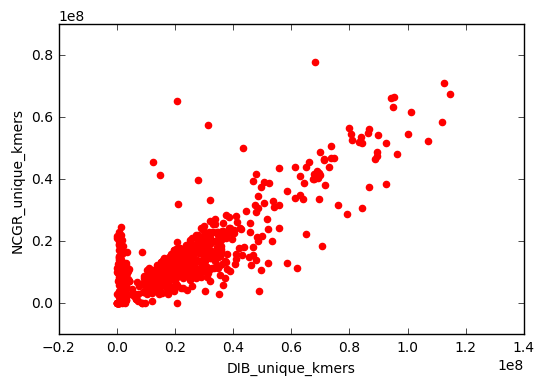

In [26]:
fig, ax = plt.subplots(1)
X = kmers_frame[['Unique_kmers_assembly']]
Y = kmers_frame[['Unique_kmers']]
ax.scatter(X,Y,color="red")
ax.set_xlabel("DIB_unique_kmers")
ax.set_ylabel("NCGR_unique_kmers")

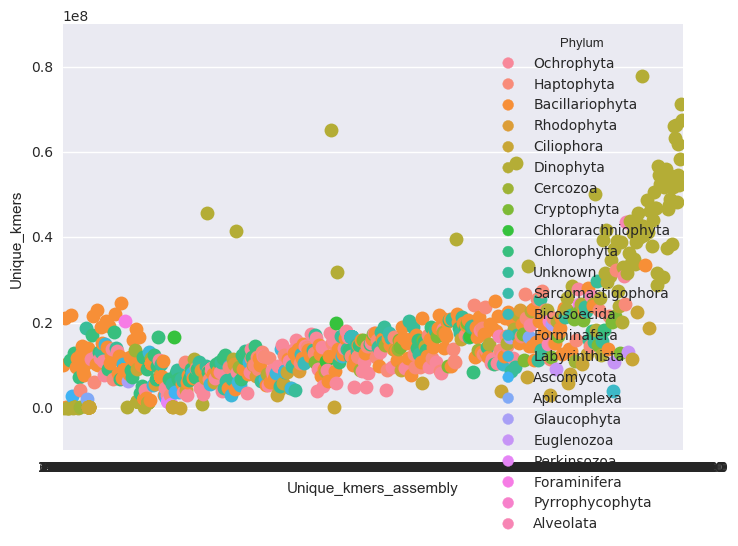

In [31]:
import seaborn as sns
sns.swarmplot(x="Unique_kmers_assembly", y="Unique_kmers", data=kmers_frame, hue="Phylum", size=10)

In [34]:
groups = kmers_frame.groupby('Phylum')

In [37]:
for name, group in groups:
    print(group)

               Phylum  Unique_kmers_assembly  Unique_kmers
SampleName                                                
MMETSP1440  Alveolata             30207199.0    16766831.0
MMETSP1441  Alveolata             41399638.0    26293822.0
MMETSP1451  Alveolata             34834044.0    14887803.0
MMETSP1462  Alveolata             55740890.0    43708565.0
                 Phylum  Unique_kmers_assembly  Unique_kmers
SampleName                                                  
MMETSP0288  Apicomplexa             32246021.0    16729737.0
MMETSP0372  Apicomplexa               705086.0     2065426.0
                Phylum  Unique_kmers_assembly  Unique_kmers
SampleName                                                 
MMETSP0232  Ascomycota               132393.0     2860061.0
MMETSP0233  Ascomycota              9146022.0     3743565.0
MMETSP0234  Ascomycota              9470259.0     3821568.0
MMETSP0235  Ascomycota              5895060.0     2252245.0
                     Phylum  Unique_kmers_

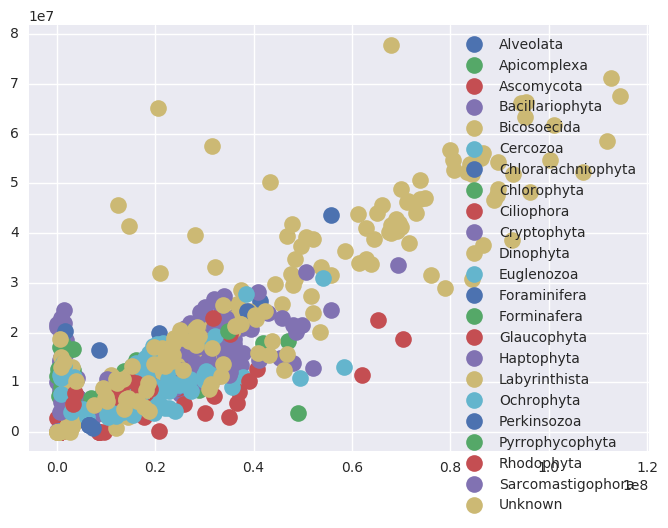

In [38]:
groups = kmers_frame.groupby('Phylum')
import palettable as pal
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Unique_kmers_assembly, group.Unique_kmers, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()